In [ ]:
# Import necessary packages
# Create any reusable methods to use later
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
def screen_data(df):
    print('-'*40)
    print('List of Columns : ', df.columns.to_list())
    print('-'*40)
    print('Missing Values in the columns : \n')
    print(df.isnull().sum())
    print('-'*40)
    print('Unique Value Counts : \n')
    print(df.nunique())
    print('-'*40)
    print(df.shape)
    print(df.info())    

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/2) Colab Notebooks/data/titanic/train.csv')
screen_data(df_train)

----------------------------------------
List of Columns :  ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
----------------------------------------
Missing Values in the columns : 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
----------------------------------------
Unique Value Counts : 

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64
----------------------------------------
(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---

In [ ]:
# Random sampling in the data
df_train.sample(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0000,B94,S
638,639,0,3,"Panula, Mrs. Juha (Maria Emilia Ojala)",female,41.0,0,5,3101295,39.6875,NaN,S
224,225,1,1,"Hoyt, Mr. Frederick Maxfield",male,38.0,1,0,19943,90.0000,C93,S
790,791,0,3,"Keane, Mr. Andrew ""Andy""",male,NaN,0,0,12460,7.7500,NaN,Q


In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/2) Colab Notebooks/data/titanic/test.csv')
screen_data(df_test)

----------------------------------------
List of Columns :  ['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
----------------------------------------
Missing Values in the columns : 

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
----------------------------------------
Unique Value Counts : 

PassengerId    418
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64
----------------------------------------
(418, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passen

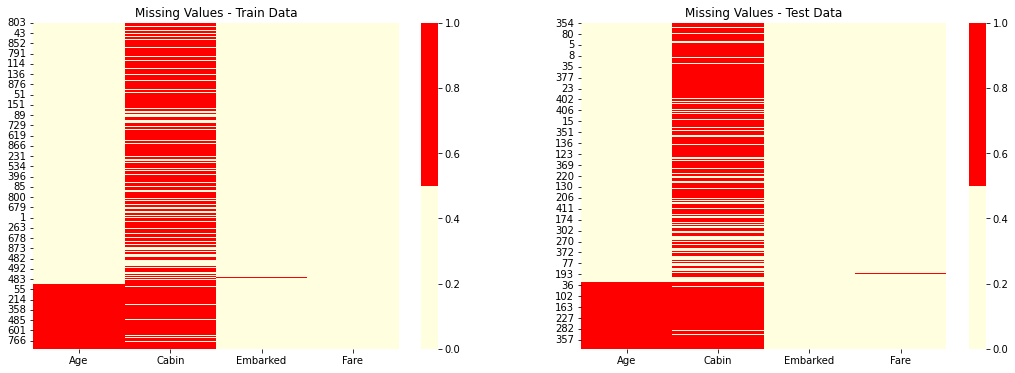

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (18, 6))
colors = ['lightyellow', 'red']

f1 = sns.heatmap(df_train[['Age', 'Cabin', 'Embarked', 'Fare']] \
                 .sort_values('Age') \
                 .isnull(),
                 cmap = sns.color_palette(colors),
                 ax = ax1
                 )
f1.set_title('Missing Values - Train Data')

f2 = sns.heatmap(df_test[['Age', 'Cabin', 'Embarked', 'Fare']] \
                 .sort_values('Age') \
                 .isnull(),
                 cmap = sns.color_palette(colors),
                 ax = ax2
                 )
f2.set_title('Missing Values - Test Data')
plt.show()

The red area in the above heat maps shows distribution of missing values in respective datasets
   * It is seens that we have large amount of missing data for Cabin column.
   * Missing data for Age is also considerable, but we can work around the same.
   * Column Embarked and Fare does not have any signicant missing data

## Data Exploration and Data Wrangling

Since exploring the data and accordingly wrangle it further the next exploration is an iterative process, we will combine the two stages together.

As part of Data Exploration stage, we would want to explore possible relaionships of the available features by looking at the Survived fact for the passengers.

We will also want to identify if there are new features we want to derive, that can be a better indicator for the survival chances.

During the wrangling, our goal is to identify and create a reusable function for the necessary pre-processing operations that needs to go on both train and test data sets, so that they remain in union standards when applied to model in later stages.

In [ ]:
df_gender = pd.read_csv('/content/drive/MyDrive/2) Colab Notebooks/data/titanic/gender_submission.csv')
screen_data(df_gender)

----------------------------------------
List of Columns :  ['PassengerId', 'Survived']
----------------------------------------
Missing Values in the columns : 

PassengerId    0
Survived       0
dtype: int64
----------------------------------------
Unique Value Counts : 

PassengerId    418
Survived         2
dtype: int64
----------------------------------------
(418, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB
None


In [ ]:
df_gender.head(3)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0


In [ ]:
df_train[['PassengerId', 'Age']] \
      .groupby('Age') \
      .count() \
      .reset_index() \
      .rename(columns = {'PassengerId' : 'Cnt'}) \
      .sort_values('Cnt', ascending = False) \
      .head(5)

,Age,Cnt
31,24.0,30
28,22.0,27
23,18.0,26
39,30.0,25
36,28.0,25


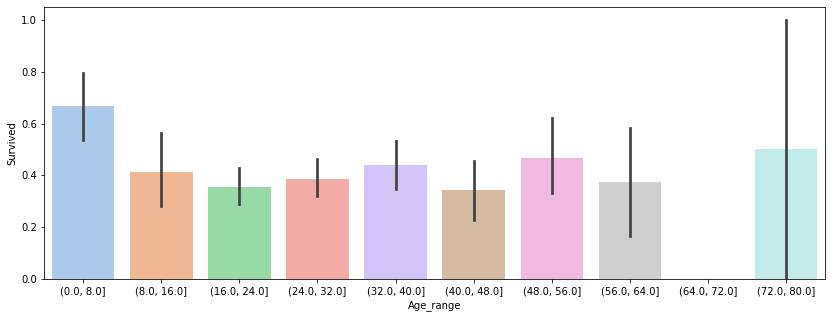

In [ ]:
# Age range로 cut하고 그래프 그림 -> 이후 해당 열 삭제
df_train['Age_range'] = pd.cut(df_train['Age'], 10, precision = 0)

fig, ax = plt.subplots(1, 1, figsize = (14, 5))
z = sns.barplot(data = df_train[['Survived', 'Age_range']],
                x = 'Age_range', y = 'Survived',
                ax = ax,
                palette = sns.color_palette('pastel')
                )
plt.show()
df_train.drop('Age_range', axis = 1, inplace = True)

 - Age data works better when put into range bins. Tickets data is basically ticket identifiers, so they can be simply removed from analysis as Ticket Id may not have any significance to survival rate

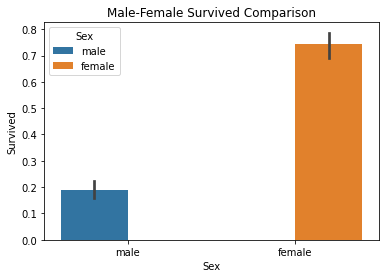

In [ ]:
s1 = sns.barplot(data = df_train,
                 x = 'Sex',
                 y = 'Survived',
                 hue = 'Sex'
                 )
s1.set_title('Male-Female Survived Comparison')
plt.show()

 * Female passengers had higher survival rate compared to male passengers.

In [ ]:
# Finding titles(prefix) in the names
# And try to explore if the Title(prefix) have any co-relation with survival
import re
from collections import Counter

def check_title(x):
      return re.search('([A-Za-z]+)\.', x).group(1)

Counter(df_train['Name'] \
        .map(check_title) \
        .to_list()
        )

Counter({'Mr': 517,
         'Mrs': 125,
         'Miss': 182,
         'Master': 40,
         'Don': 1,
         'Rev': 6,
         'Dr': 7,
         'Mme': 1,
         'Ms': 1,
         'Major': 2,
         'Lady': 1,
         'Sir': 1,
         'Mlle': 2,
         'Col': 2,
         'Capt': 1,
         'Countess': 1,
         'Jonkheer': 1})

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:1296: UserWarning: 98.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:1296: UserWarning: 95.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:1296: UserWarning: 96.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:1296: UserWarning: 85.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; y

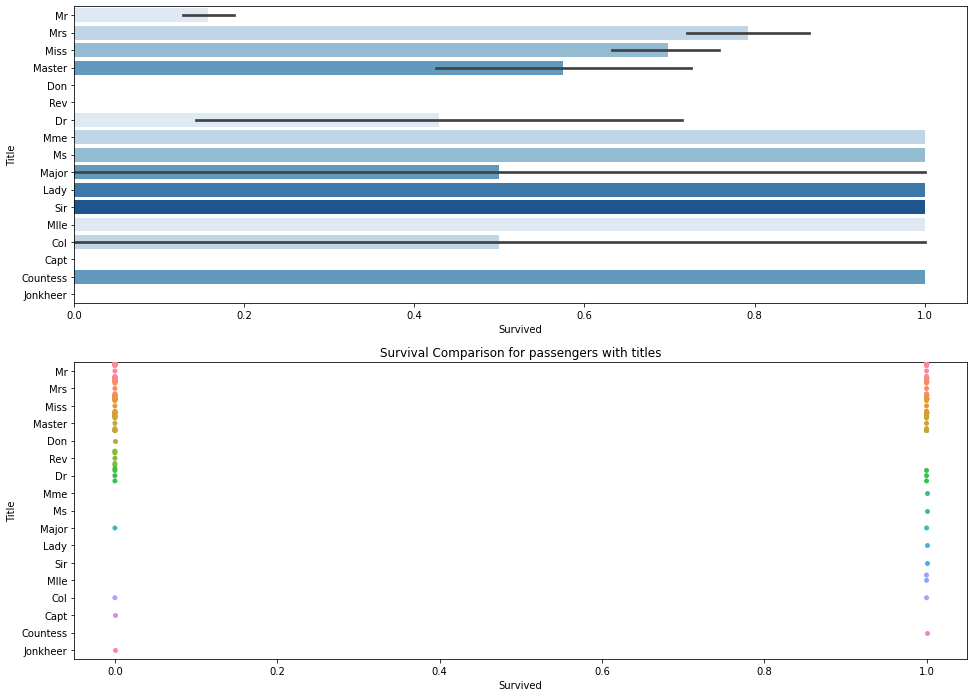

In [ ]:
df_train['Title'] = df_train['Name'].map(check_title)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (16, 12))

bar = sns.barplot(data = df_train[['Survived', 'Title']],
                  y = 'Title',
                  x = 'Survived',
                  orient = 'h',
                  palette = sns.color_palette('Blues'),
                  ax = ax1
                  )
bar  = sns.swarmplot(data = df_train[['Survived', 'Title']],
                  y = 'Title', x = 'Survived',
                  ax = ax2
)
bar.set_title('Survival Comparison for passengers with titles')
plt.show()

df_train.drop('Title', axis = 1, inplace = True)

 ** There is definite inclination to survival for some titles like Lady, Sir, Countess etc. To capture this in our prediction, we will want to add a new derived feature for 'title' in our data set.

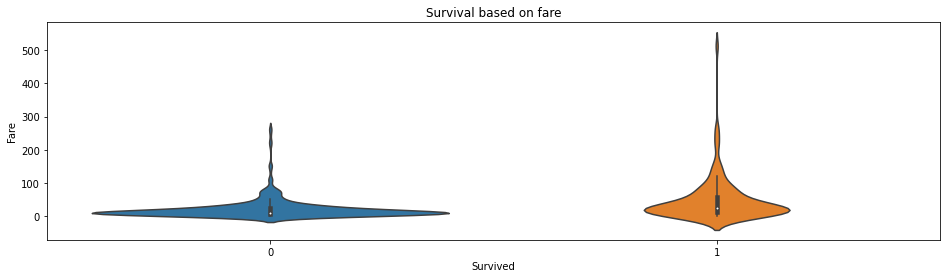

In [ ]:
# df_train['Fare Range'] = pd.cut(df_train['Fare'], 10, precision=0)

fig, ax = plt.subplots(1, 1, figsize = (16, 4))
bar = sns.violinplot(data = df_train[['Survived', 'Fare']],
                     y = 'Fare', x = 'Survived',
                     ax = ax)
bar.set_title('Survival based on fare')
plt.show()

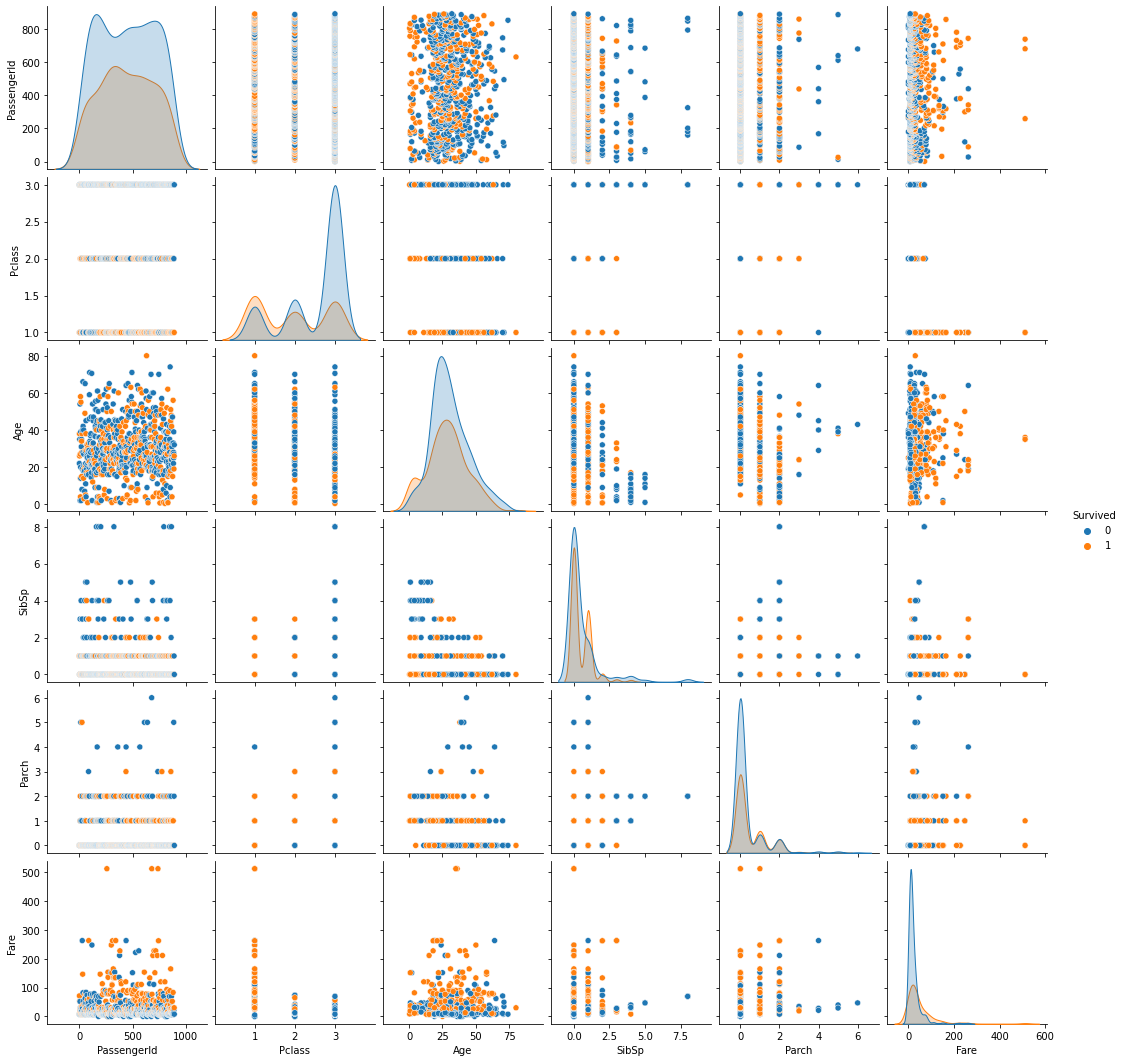

In [ ]:
# Exploring multiple features together
sns.pairplot(df_train,
             hue = 'Survived')

 * We can observe in above visuals that survival rate is:
        1. Better on certain P-class values
        2. Better on certain Age ranges
        3. Not so focused on Parch Values
        4. Better to for very high fare rate

 * For other features such as PassengerId, the survival rate is not having any centralized inclination on the feature at individual values level.

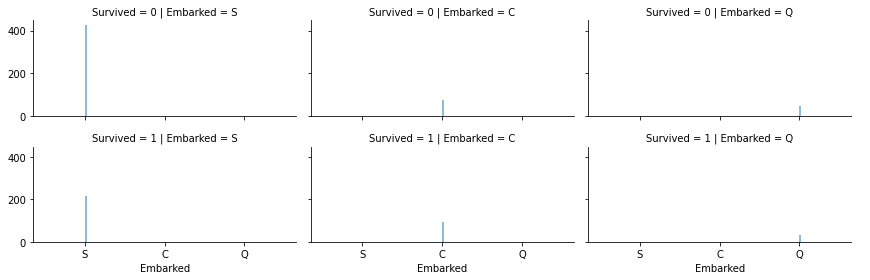

In [ ]:
# Checking embarked for survival
grid = sns.FacetGrid(df_train,
                     row = 'Survived',
                     col = 'Embarked',
                     height = 2,
                     aspect = 2,
                     palette = sns.color_palette('ocean')
                     )
grid.map(plt.hist, 'Embarked', alpha = .5, bins = 50)
grid.add_legend()
plt.show()

## Feature engineering

 * Building a reusable function to apply on both train and test data set

In [ ]:
def feature_process(df):
      df['Embarked'].fillna(df['Embarked'].mode(), inplace = True)    # Fix missing values in Embarked if any
      df['Fare'].fillna(df['Fare'].mean(), inplace = True)    # Fix missing value to mean in Fare
      df['Age'].fillna(df['Age'].median(), inplace = True)    # Put median value for Age

      if 'Cabin' in df.columns:
          df.drop('Cabin', axis = 1, inplace = True)
      if 'Ticket' in df.columns:
          df.drop('Ticket', axis = 1, inplace = True)

      df['Age_cd'] = pd.cut(df_train['Age'], 10, precision = 0) \
                          .astype('category') \
                          .cat.codes
    # new Columns to bucket the age ranges and putting code for it
# df['Fare_range'] = pd.cut(df_train['Fare'], 10, precision = 0)    # New Column

      df['Embarked_cd'] = df['Embarked'].astype('category').cat.codes
      df['Title_cd'] = df['Name'].map(check_title).astype('category').cat.codes
      df['Sex_cd'] = df['Sex'].astype('category').cat.codes

      print('Preprocessing on the data complete ..')

### Running the preprocessing on train test data set

In [ ]:
feature_process(df_train)

Preprocessing on the data complete ..


In [ ]:
feature_process(df_test)

Preprocessing on the data complete ..


In [ ]:
df_train.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Age_cd,Embarked_cd,Title_cd,Sex_cd
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,2,12,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,4,0,13,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,3,2,9,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,4,2,13,0


In [ ]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked', 'Age_cd', 'Embarked_cd', 'Title_cd',
       'Sex_cd'],
      dtype='object')

## Checking correlation of various features

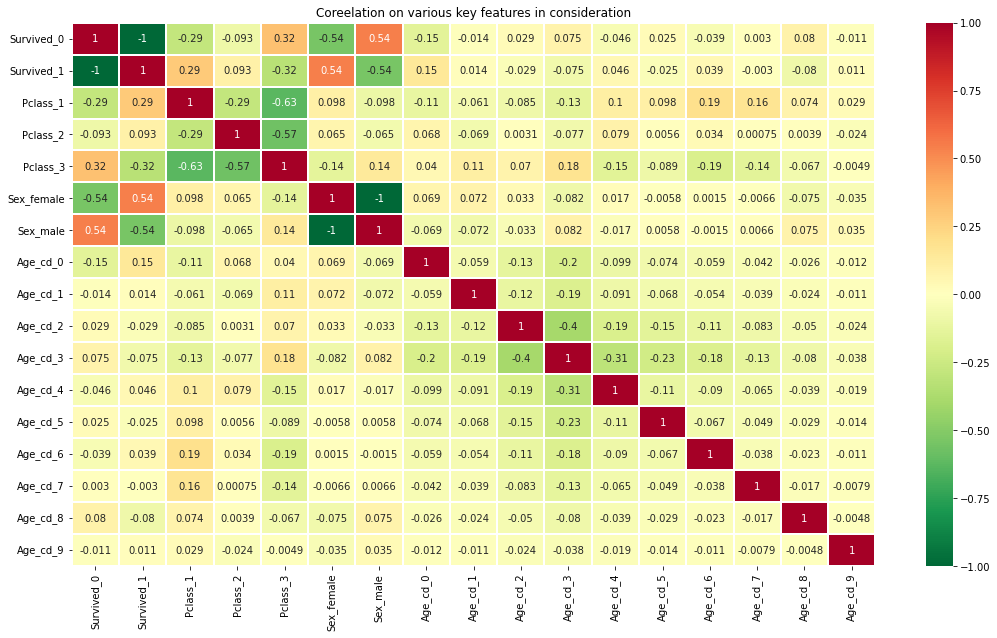

In [ ]:
h = sns.heatmap(pd.get_dummies(df_train[['Survived', 'Pclass', 'Sex', 'Age_cd']],
                               columns = ['Survived', 'Pclass', 'Sex', 'Age_cd']) \
                .corr(),
                annot = True,
                cmap = 'RdYlGn_r',
                linewidths = 0.2
                )
fig = plt.gcf()     # Get Current Figure

h.set_title('Coreelation on various key features in consideration')
fig.set_size_inches([18, 10])
plt.show()

## Building the model

 * In this stage we will be building our models. As already identifierd in the objective section above, we will be looking to build 2 type of mdoels.
      1. SVM model
      2. Logistic Regression model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# from sklearn.model_selection import cross_val_score

In [ ]:
# identifier features to be used
features = ['Pclass', 'SibSp', 'Parch', 'Fare', 'Age_cd', 'Sex_cd', 'Embarked_cd', 'Title_cd']

X_train, X_test, y_train, y_test = train_test_split(df_train[features],
                                                    df_train['Survived'],
                                                    test_size = 0.3,
                                                    random_state = 25)

# Check basic setup of train and test
for x, y in enumerate([X_train, X_test, y_train, y_test]):
      print(f'{x+1}: {y.shape}')

1: (623, 8)
2: (268, 8)
3: (623,)
4: (268,)


In [ ]:
# Logistic regression
lr = LogisticRegression(max_iter = 2000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [ ]:
# SVM
svm = SVC(kernel = 'rbf',
          C = 100,
          random_state = 1)
svm.fit(X_train, y_train)

SVC(C=100, random_state=1)

## Model Evaluation

In [ ]:
############################################ 모델 평가용 함수 ###################
def evaluate_model(model_name):
      print('-'*40, '\n')
      print('Evaluation model: ', model_name)
      print('\n', '-'*40, '\n')
      y_predict = model_name.predict(X_test)
      acc = accuracy_score(y_test, y_predict)
      print(f'Accuracy score of the model: {acc*100: .3f} %')
      cmat = confusion_matrix(y_test, y_predict)
      scores = cmat.diagonal() / cmat.sum(axis = 1)

      for x in zip(['Not Survived', 'Survived'], scores):
          print(f'Accuracy score for - {x[0]} : {x[1]*100: .3f} %')
      print('-'*40, '\n')
      sns.heatmap(cmat,
                  cmap = 'Set3',
                  annot = True,
                  fmt = '4.0f'
                  )
      title = f'Confusion_matrix : {model_name}'
      plt.title(f'{title}', y = 1.1, size = 14)
      plt.show()

---------------------------------------- 

Evaluation model:  LogisticRegression(max_iter=2000)

 ---------------------------------------- 

Accuracy score of the model:  78.731 %
Accuracy score for - Not Survived :  84.242 %
Accuracy score for - Survived :  69.903 %
---------------------------------------- 



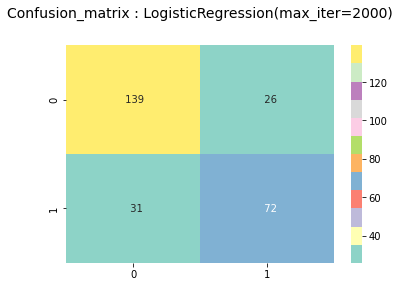

In [ ]:
evaluate_model(lr)

---------------------------------------- 

Evaluation model:  SVC(C=100, random_state=1)

 ---------------------------------------- 

Accuracy score of the model:  77.985 %
Accuracy score for - Not Survived :  81.818 %
Accuracy score for - Survived :  71.845 %
---------------------------------------- 



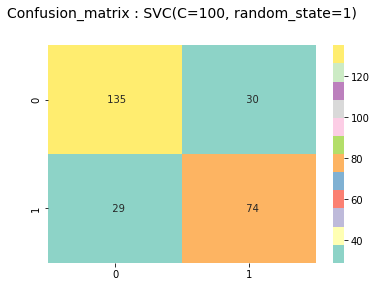

In [ ]:
evaluate_model(svm)

## Prediction of the test set

In [ ]:
prediction = svm.predict(df_test[features])
final = pd.DataFrame({'PassengerId' : df_test['PassengerId'], 'Survived': prediction})
final.to_csv('./submission_svm.csv', index = False)

final.head()

,PassengerId,Survived
0,892,1
1,893,1
2,894,1
3,895,0
4,896,1


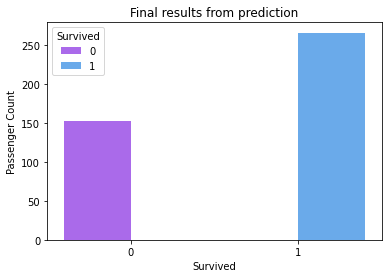

,Survived,Passenger Count
0,0,152
1,1,266


In [ ]:
df_result = final.groupby('Survived') \
      .count() \
      .reset_index() \
      .rename(columns = {'PassengerId': 'Passenger Count'})
res = sns.barplot(data = df_result,
                  x = 'Survived', y = 'Passenger Count',
                  hue = 'Survived',
                  palette = 'cool_r'
                  )
res.set_title('Final results from prediction')
plt.show()
df_result